In [1]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R

# Switch values if necessary 1 11 2021
Dist_prism_12 = 1.0398341231585624*1000
Dist_prism_13 = 0.818424700118086*1000
Dist_prism_23 = 0.8806156053859284*1000
Dist_GPS_12 = 0.835637436093363*1000
Dist_GPS_13 = 0.7812173648662254*1000
Dist_GPS_23 = 0.5166745729506486*1000

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


<IPython.core.display.Javascript object>


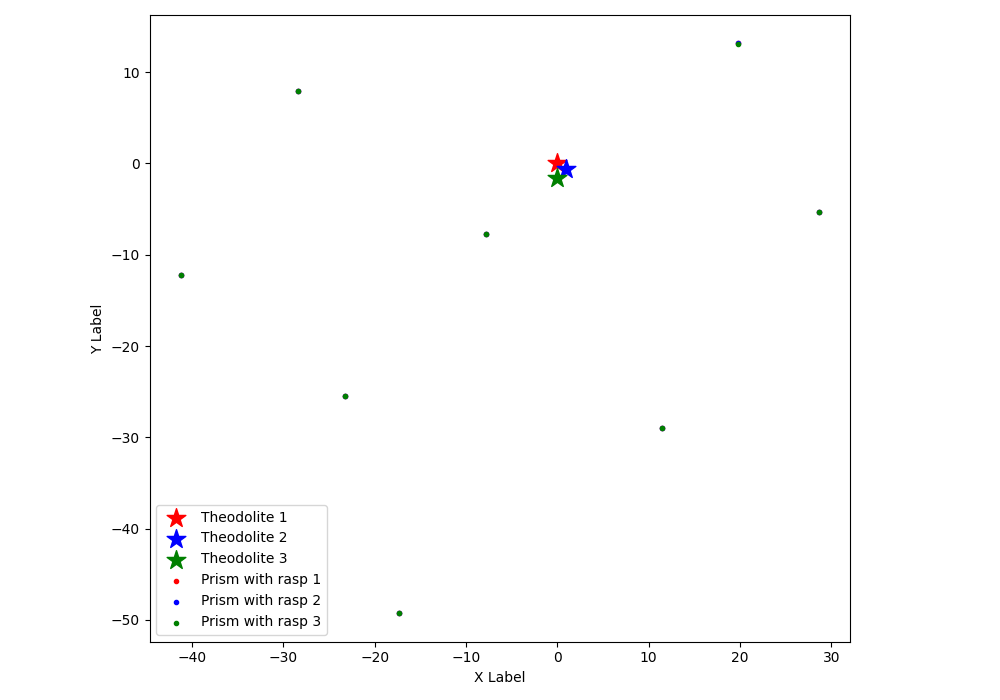

In [2]:
%matplotlib notebook
# Read markers file of grand axe and show them
tfu = importlib.reload(tfu)
file_name = '/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021_11_16_theodolite_reference_prisms.txt'
trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand = tfu.read_marker_file(file_name, 1)
tfu.plot_trajectories_prism(3, trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand, 0, 0,"example.pdf",1)

Number of data for theodolites: [1201 1182 1181]
Bad measures: 50


<IPython.core.display.Javascript object>


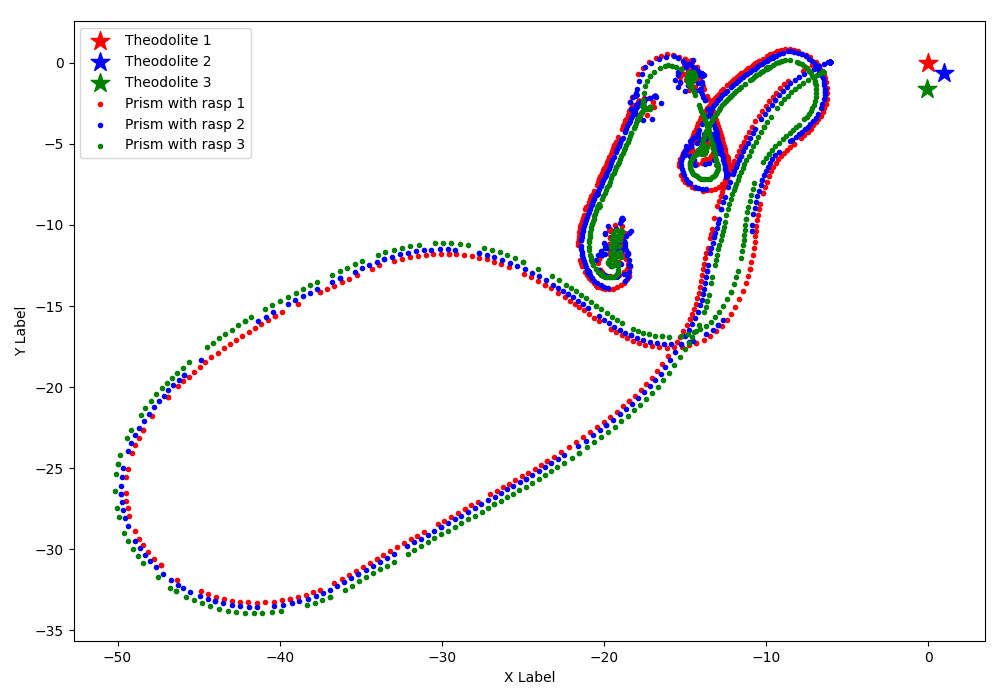

In [33]:
# Read rosbag of grand axe and show the trajectory
tfu = importlib.reload(tfu)
# small loop 1
file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021-11-16-15-05-36_filtered.bag"
# small loop 2
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021-11-16-15-13-53_filtered.bag"
# long bag
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021-11-16-15-20-59_filtered.bag"
# short bag end
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021-11-16-16-15-00_filtered.bag"

Tf = []
Tf.append(T_1_grand)
Tf.append(T_2_grand)
Tf.append(T_3_grand)
trajectory_trimble_1, trajectory_trimble_2, trajectory_trimble_3, time_trimble_1, time_trimble_2, time_trimble_3 = tfu.read_rosbag_theodolite_with_tf(file, Tf)
trimble_1 = np.array(trajectory_trimble_1).T
trimble_2 = np.array(trajectory_trimble_2).T
trimble_3 = np.array(trajectory_trimble_3).T

%matplotlib notebook
# Variable to plot in 3d, 0 = 2D, 1 = 3D
plot_3d = 0
# Variable to save file in pdf
save_pdf = 0
# file name to save plot in pdf
file_pdf = "./figs/grand_axe_4.pdf"

tfu.plot_trajectories_prism(3, trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand, plot_3d, save_pdf, file_pdf, 1)

<IPython.core.display.Javascript object>


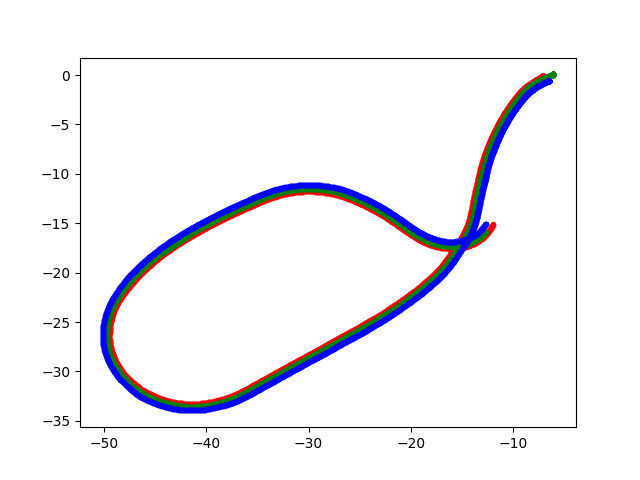

In [34]:
# Work on the data with 3 prisms and 3 theodolites
tfu = importlib.reload(tfu)
# Slipt the data into different interval according to the timestamps of the measurments
limit_time_interval = 4
list_interval, list_time = tfu.split_time_interval_all_data(time_trimble_1, time_trimble_2, time_trimble_3, limit_time_interval)
# Keep only the intervals where the three theodlites have done some measurements at the same time
limit_search = 4
list_trajectories_split = tfu.merge_interval(list_interval, list_time, time_trimble_1, time_trimble_2, time_trimble_3, limit_search)
# Plot subtrajectory for debug
#tfu.plot_subtrajectory_result(0, list_trajectories_split, trimble_1, trimble_2, trimble_3)
# Interpolate linearly all of these sub-trajectories
time_step = 0.05
interpolated_time, interpolated_trajectories = tfu.time_interpolation_subtrajectories(time_step, list_trajectories_split, trimble_1, trimble_2, trimble_3, time_trimble_1, time_trimble_2, time_trimble_3)
# Plot one sub-trajectory interpolated
tfu.plot_interpolated_subtrajectory_result(0, interpolated_trajectories)
# Ptp minimization with interpolated trajectories
#Pose_lidar, Prism_corrected, list_lidar_time = tfu.ptp_minimization_with_interpolated_trajectories(interpolated_trajectories, interpolated_time)
# Plot ptp
#tfu.ptp_plot(Pose_lidar, Prism_corrected, interpolated_trajectories, 0, 6, 7)
#tfu.plot_trajectories_prism_with_lidar(3, trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand, Pose_lidar, list_lidar_time, 0, 1, "/home/maxime/results_ski_trail.pdf", 1)

In [38]:
number_sub = 1
distance=[]
for (i,j,k) in zip(interpolated_trajectories[number_sub][0].T,interpolated_trajectories[number_sub][1].T,interpolated_trajectories[number_sub][2].T):
    d12 = abs(np.linalg.norm(i-j)*1000-Dist_prism_12)
    d13 = abs(np.linalg.norm(i-k)*1000-Dist_prism_13)
    d23 = abs(np.linalg.norm(j-k)*1000-Dist_prism_23)
    md = np.mean([d12, d13, d23])
    distance.append(np.array([d12, d13, d23, md]))

<IPython.core.display.Javascript object>


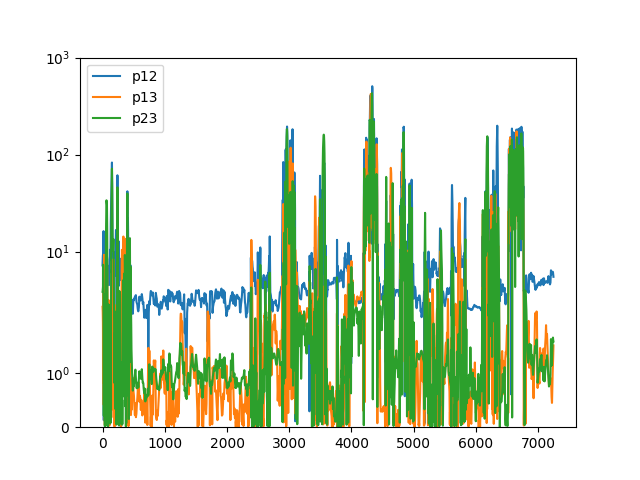

In [39]:
distance_r = np.array(distance)
plt.figure(0)
plt.plot(distance_r[:,0], label="p12")
plt.plot(distance_r[:,1], label="p13")
plt.plot(distance_r[:,2], label="p23")
#plt.plot(distance_r[:,3], label="m")
ax = plt.gca()
ax.set_yscale('symlog')
plt.legend(loc='best')
ax.set_ylim([0, 1000])
plt.show()

7247
16.245145919953583 7.865785762054405 9.721586754407317
39.19365398355801 25.95862686860847 29.304794342512817


<IPython.core.display.Javascript object>


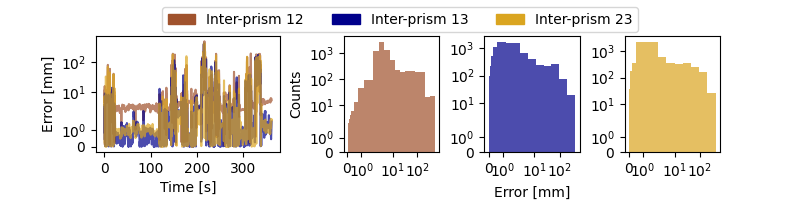

/home/norlab/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [40]:
import scripts.theodolite_plot_function as ptfuu
ptfuu = importlib.reload(ptfuu)
name_fig = "./figs/Linear_data1_1_prism_error.pdf"
save = True
ptfuu.subplot_prisms_error(interpolated_time[number_sub], distance, save, name_fig)

In [ ]:
#Not moving pose with speed search and distance computed
tfu = importlib.reload(tfu)
import theodolite_plot_function as tfup
tfup = importlib.reload(tfup)
# Find not moving time interval of warthog
speed_limit = 0.001
time_limit = 4
not_moving_time = tfu.find_warthog_not_moving_time_interval(speed, speed_limit, time_limit)
print(not_moving_time[0][0],time_trimble_1[-1],not_moving_time[0][-1])
print(time_trimble_1[0]-speed[0][0])
print(time_trimble_1[-1]-time_trimble_1[0])
# Find not moving prism time
number_points_limit = 0
not_moving_prism_1, not_moving_prism_2, not_moving_prism_3 = tfu.find_prism_not_moving_time(not_moving_time, time_trimble_1, time_trimble_2, time_trimble_3, number_points_limit)
print("Number static pose of warthog detected:", len(not_moving_prism_1))
# Make tupple of prism positions when warthog is static
time_limit = 0.5
not_moving_tuple = tfu.make_tupple_not_moving_point(not_moving_prism_1, not_moving_prism_2, not_moving_prism_3, time_trimble_1, time_trimble_2, time_trimble_3, time_limit)
print("Number of samples: ", len(not_moving_tuple))
# Compute distance between prisms
distance_12, distance_13, distance_23 = tfu.compute_distance(trimble_1, trimble_2, trimble_3, not_moving_tuple)

# Plot results
print("Distance prism 1 to 2 (mm): ", Dist_prism_12)
print("Distance prism 1 to 3 (mm): ", Dist_prism_13)
print("Distance prism 2 to 3 (mm): ", Dist_prism_23)
save_fig = True
#name_file = "./resultats/ski_trail/175838/histogram_measurement_static_prism_ski_trail_experiment_175838.jpg"
#name_file = "./resultats/ski_trail/180119/histogram_measurement_static_prism_ski_trail_experiment_180119.pdf"
#name_file = "./resultats/ski_trail/180508/histogram_measurement_static_prism_ski_trail_experiment_180508.jpg"
#name_file = "./resultats/quarry/115730/histogram_measurement_static_prism_quarry_experiment_115730.jpg"
#name_file = "./resultats/quarry/121423/histogram_measurement_static_prism_quarry_experiment_121423.jpg"
#name_file = "./resultats/quarry/133515/histogram_measurement_static_prism_quarry_experiment_133515.jpg"
#name_file = "./resultats/hell/172901/histogram_measurement_static_prism_hell_experiment_172901.jpg"
#name_file = "./resultats/hell/180021/histogram_measurement_static_prism_hell_experiment_180021.jpg"
#name_file = "./resultats/hell/181543/histogram_measurement_static_prism_hell_experiment_181543.jpg"
#name_file = "./resultats/steady/113705/histogram_measurement_static_prism_steady_experiment_113705.jpg"
#name_file = "./resultats/steady/122841/histogram_measurement_static_prism_steady_experiment_122841.jpg"
name_file = "/home/maxime/Papers/jupyter/resultats/grand_axe/114254/histogram_measurement_static_prism_experiment_114254.pdf"
tfup.subplot_histogram(distance_12, distance_13, distance_23, save_fig, name_file)
# Result after interpolation for static poses
not_moving_interpolated_prism = tfu.find_interpolated_prism_not_moving_time(not_moving_time, interpolated_trajectories, interpolated_time)
distance_12_not_moving, distance_13_not_moving, distance_23_not_moving = tfu.compute_interpolated_distance(not_moving_interpolated_prism, interpolated_trajectories)
# Plot results
#name_file = "./resultats/ski_trail/175838/histogram_measurement_static_interpolated_prism_ski_trail_experiment_175838.jpg"
name_file = "./resultats/ski_trail/180119/histogram_measurement_static_interpolated_prism_ski_trail_experiment_180119.pdf"
#name_file = "./resultats/ski_trail/180508/histogram_measurement_static_interpolated_prism_ski_trail_experiment_180508.jpg"
#name_file = "./resultats/quarry/115730/histogram_measurement_static_interpolated_prism_quarry_experiment_115730.jpg"
#name_file = "./resultats/quarry/121423/histogram_measurement_static_interpolated_prism_quarry_experiment_121423.jpg"
#name_file = "./resultats/quarry/133515/histogram_measurement_static_interpolated_prism_quarry_experiment_133515.jpg"
#name_file = "./resultats/hell/172901/histogram_measurement_static_interpolated_prism_hell_experiment_172901.jpg"
#name_file = "./resultats/hell/180021/histogram_measurement_static_interpolated_prism_hell_experiment_180021.jpg"
#name_file = "./resultats/hell/181543/histogram_measurement_static_interpolated_prism_hell_experiment_181543.jpg"
#name_file = "./resultats/steady/113705/histogram_measurement_static_interpolated_prism_steady_experiment_113705.jpg"
#name_file = "./resultats/steady/122841/histogram_measurement_static_interpolated_prism_steady_experiment_122841.jpg"
#tfu.subplot_histogram(distance_12_not_moving, distance_13_not_moving, distance_23_not_moving, save_fig, name_file)

In [ ]:
tfu = importlib.reload(tfu)
import theodolite_plot_function as tfup
tfup = importlib.reload(tfup)

file_marker = '/home/maxime/theodolites_tests/data_for_processing/grand_axe/20210310_theodolite_reference_prisms_first_calib.txt'
file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-11-42-54_theodolite_GPS.renamed.renamed.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-11-42-54_imu_data.bag"
name_file_gps = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-11-42-54_GPS_rtk_data.bag"
time_offset = -4992.579321146011+0.2+1
#file_marker = '/home/maxime/theodolites_tests/data_for_processing/grand_axe/20210310_second_theodolite_reference_prisms.txt'
#file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-13-27-18_theodolite_GPS.renamed.renamed.bag"
#file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-13-27-18_imu_data.bag"
#name_file_gps = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-13-27-18_GPS_rtk_data.bag"
#time_offset = -4992.579321146011+0.2
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu, time_offset)
gps_front, gps_back = tfu.read_rosbag_gps_odom(name_file_gps, 2, time_offset)
# Find not moving time interval of warthog
speed_limit = 0.001
time_limit = 4
not_moving_time = tfu.find_warthog_not_moving_time_interval(speed, speed_limit, time_limit)
print(len(not_moving_time))

In [ ]:
print(trimble_1[:,7348])

In [ ]:
tfu = importlib.reload(tfu)
not_moving_time_list = []
not_moving_time[2][0] = not_moving_time[2][0]+10
compteur = 0
for i in not_moving_time:
    if(compteur!=12):
        not_moving_time_list.append(i)
    compteur=compteur+1
number_points_limit = 0
time_limit = 0.5
distance_12, distance_13, distance_23, distance_gps_stay = tfu.compute_inter_error(not_moving_time_list, time_trimble_1, time_trimble_2, time_trimble_3, trimble_1, trimble_2, trimble_3, number_points_limit, time_limit, gps_front, gps_back, interpolated_time)
fig = plt.figure(figsize=(8, 3))
plt.plot(distance_12, label="12")
plt.plot(distance_13, label="13")
plt.plot(distance_23, label="23")
plt.legend()

In [ ]:
import theodolite_plot_function as tfup
tfup = importlib.reload(tfup)
scale = np.array([1500,1500,1500,300])
save_fig = True
#name_file = "/home/maxime/Papers/jupyter/resultats/grand_axe/114254/static_prism_first_experiment_114254_total.pdf"
name_file = "/home/maxime/Papers/jupyter/resultats/grand_axe/132718/static_prism_second_experiment_132718_17.pdf"
tfup.subplot_histogram_prism_gps(distance_12, distance_13, distance_23, distance_gps_stay, save_fig, name_file, scale)

In [ ]:
tfu = importlib.reload(tfu)
import theodolite_plot_function as tfup
tfup = importlib.reload(tfup)

#file_marker = '/home/maxime/theodolites_tests/data_for_processing/grand_axe/20210310_theodolite_reference_prisms_first_calib.txt'
#file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-11-42-54_theodolite_GPS.renamed.renamed.bag"
#file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-11-42-54_imu_data.bag"
#name_file_gps = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-11-42-54_GPS_rtk_data.bag"
#time_offset = -4992.579321146011
file_marker = '/home/maxime/theodolites_tests/data_for_processing/grand_axe/20210310_second_theodolite_reference_prisms.txt'
file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-13-27-18_theodolite_GPS.renamed.renamed.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-13-27-18_imu_data.bag"
name_file_gps = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-13-27-18_GPS_rtk_data.bag"
#time_offset = -4990.6132526397705
time_offset = -4992.579321146011+0.2
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu, time_offset)
gps_front, gps_back = tfu.read_rosbag_gps_odom(name_file_gps, 2, time_offset)
# Find not moving time interval of warthog
speed_limit = 0.001
time_limit = 4
not_moving_time = tfu.find_warthog_not_moving_time_interval(speed, speed_limit, time_limit)
print(len(not_moving_time))

In [ ]:
tfu = importlib.reload(tfu)
not_moving_time_list = []
not_moving_time_list.append(not_moving_time[5])
number_points_limit = 0
time_limit = 0.5
distance_12_2, distance_13_2, distance_23_2, distance_gps_stay_2 = tfu.compute_inter_error(not_moving_time, time_trimble_1, time_trimble_2, time_trimble_3, trimble_1, trimble_2, trimble_3, number_points_limit, time_limit, gps_front, gps_back, interpolated_time)
print(len(distance_12_2))

In [ ]:
import theodolite_plot_function as tfup
tfup = importlib.reload(tfup)
scale = np.array([1500,300])
save_fig = False
name_file = "/home/maxime/Papers/jupyter/resultats/grand_axe/114254/static_prism_both_experiment_114254.pdf"
#name_file = "/home/maxime/Papers/jupyter/resultats/grand_axe/132718/static_prism_second_experiment_132718_17.pdf"
tfup.subplot_histogram_all_prism_gps(distance_12, distance_13, distance_23, distance_gps_stay, distance_12_2, distance_13_2, distance_23_2, distance_gps_stay_2, save_fig, name_file, scale)

In [ ]:
fig = plt.figure(figsize=(8, 3))
plt.plot(distance_12_2, label="12")
plt.plot(distance_13_2, label="13")
plt.plot(distance_23_2, label="23")
plt.legend()

In [ ]:
tfu = importlib.reload(tfu)
# Dynamic pose after interpolation
# Sort points according to speed and calculate it distance (Take some minutes)
distance_12_speed, distance_13_speed, distance_23_speed, speed_interval = tfu.sort_interpolated_point_accoridng_to_speed(1, 160, 17, interpolated_trajectories, interpolated_time, speed)

In [ ]:
tfu = importlib.reload(tfu)
# Statistic about dynamic interpolated points
speed_axis, mean_list, std_list, true_value_list = tfu.statistic_dynamic_interpolated_points(distance_12_not_moving, distance_13_not_moving, distance_23_not_moving, Dist_prism_12, Dist_prism_13, Dist_prism_23, speed_interval, distance_12_speed, distance_13_speed, distance_23_speed)
# Plot the results
save_fig = False
#name_file = "./resultats/ski_trail/175838/Statistic_dynamic_interpolated_distance_over_speed_ski_trail_experiment_175838.jpg"
name_file = "./resultats/ski_trail/180119/Statistic_dynamic_interpolated_distance_over_speed_ski_trail_experiment_180119.jpg"
#name_file = "./results/ski_trail/180508/Statistic_dynamic_interpolated_distance_over_speed_ski_trail_experiment_180508.jpg"
#name_file = "./resultats/quarry/121423/Statistic_dynamic_interpolated_distance_over_speed_quarry_experiment_121423.jpg"
#name_file = "./resultats/quarry/133515/Statistic_dynamic_interpolated_distance_over_speed_quarry_experiment_133515.jpg"
#name_file = "./resultats/hell/172901/Statistic_dynamic_interpolated_distance_over_speed_hell_experiment_172901.jpg"
#name_file = "./resultats/hell/180021/Statistic_dynamic_interpolated_distance_over_speed_hell_experiment_180021.jpg"
#name_file = "./resultats/hell/181543/Statistic_dynamic_interpolated_distance_over_speed_hell_experiment_181543.jpg"
#name_file = "./resultats/steady/113705/Statistic_dynamic_interpolated_distance_over_speed_steady_experiment_113705.jpg"
#name_file = "./resultats/steady/122841/Statistic_dynamic_interpolated_distance_over_speed_steady_experiment_122841.jpg"
tfu.plot_statistic_dynamic_interpolation(speed_axis, mean_list, std_list, true_value_list, save_fig, name_file, False)

In [ ]:
tfu = importlib.reload(tfu)
#file = "/home/maxime/theodolites_tests/data_for_processing/ski_trail/2020-10-08-17_58_38_imu_data.bag"
file = "/home/maxime/theodolites_tests/data_for_processing/ski_trail/2020-10-08-18-01-19_imu_data.bag"
#file = "/home/maxime/theodolites_tests/data_for_processing/ski_trail/2020-10-08-18-05-08_ski_trail_start_stop_straight_segment_imu_data.bag"
#file = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-12-14-23_imu_data.bag"
#file = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-13-35-15_start_stop_mapping_but_sensors_missing_imu_data.bag"
#file = "/home/maxime/theodolites_tests/data_for_processing/hell/2020-12-01-17-29-01_imu_data.bag"
#file = "/home/maxime/theodolites_tests/data_for_processing/hell/2020-12-01-18-00-21_imu_data.bag"
#file = "/home/maxime/theodolites_tests/data_for_processing/hell/2020-12-01-18-15-43_imu_data.bag"
#file = "/home/maxime/theodolites_tests/data_for_processing/steady/2020-12-02-11-37-05_imu_data.bag"
#file = "/home/maxime/theodolites_tests/data_for_processing/steady/2020-12-02-12-28-41_imu_data.bag"
angular_speed = tfu.read_rosbag_imu_data(file, False)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
plt.plot(np.array(angular_speed)[:,0], np.array(angular_speed)[:,1], 'r')
#ax.set_aspect('equal')
plt.show()

In [ ]:
tfu = importlib.reload(tfu)
# Dynamic pose after interpolation according angular velocity
# Sort points according to speed and calculate it distance (Take some minutes)
distance_12_angular, distance_13_angular, distance_23_angular, angular_interval = tfu.sort_interpolated_point_accoridng_to_speed(0, 35, 10, interpolated_trajectories, interpolated_time, angular_speed)

In [ ]:
tfu = importlib.reload(tfu)
# Statistic about dynamic interpolated points according velocity
speed_axis, mean_list, std_list, true_value_list = tfu.statistic_dynamic_interpolated_points(distance_12_not_moving, distance_13_not_moving, distance_23_not_moving, Dist_prism_12, Dist_prism_13, Dist_prism_23, angular_interval, distance_12_angular, distance_13_angular, distance_23_angular)
# Plot the results
save_fig = False
#name_file = "./resultats/ski_trail/175838/Statistic_dynamic_interpolated_distance_over_angular_speed_ski_trail_experiment_175838.jpg"
name_file = "./resultats/ski_trail/180119/Statistic_dynamic_interpolated_distance_over_angular_speed_ski_trail_experiment_180119.jpg"
#name_file = "./resultats/ski_trail/180508/Statistic_dynamic_interpolated_distance_over_angular_speed_ski_trail_experiment_180508.jpg"
#name_file = "./resultats/quarry/121423/Statistic_dynamic_interpolated_distance_over_angular_speed_quarry_experiment_121423.jpg"
#name_file = "./resultats/quarry/133515/Statistic_dynamic_interpolated_distance_over_angular_speed_quarry_experiment_133515.jpg"
#name_file = "./resultats/hell/172901/Statistic_dynamic_interpolated_distance_over_angular_speed_hell_experiment_172901.jpg"
#name_file = "./resultats/hell/180021/Statistic_dynamic_interpolated_distance_over_angular_speed_hell_experiment_180021.jpg"
#name_file = "./resultats/hell/181543/Statistic_dynamic_interpolated_distance_over_angular_speed_hell_experiment_181543.jpg"
#name_file = "./resultats/steady/113705/Statistic_dynamic_interpolated_distance_over_angular_speed_steady_experiment_113705.jpg"
#name_file = "./resultats/steady/122841/Statistic_dynamic_interpolated_distance_over_angular_speed_steady_experiment_122841.jpg"
tfu.plot_statistic_dynamic_interpolation(speed_axis, mean_list, std_list, true_value_list, save_fig, name_file, True)

In [ ]:
# create figure and axis objects with subplots()
tfu = importlib.reload(tfu)
save_fig = False
#name_file = "./resultats/ski_trail/175838/Error_prism_and_linear_angular_speed_ski_trail_experiment_175838.jpg"
name_file = "./resultats/ski_trail/180119/Error_prism_and_linear_angular_speed_ski_trail_experiment_180119.pdf"
#name_file = "./resultats/ski_trail/180508/Error_prism_and_linear_angular_speed_ski_trail_experiment_180508.jpg"
#name_file = "./resultats/quarry/121423/Error_prism_and_linear_angular_speed_quarry_experiment_121423.jpg"
#name_file = "./resultats/quarry/133515/Error_prism_and_linear_angular_speed_quarry_experiment_133515.jpg"
#name_file = "./resultats/hell/172901/Error_prism_and_linear_angular_speed_hell_experiment_172901.jpg"
#name_file = "./resultats/hell/180021/Error_prism_and_linear_angular_speed_hell_experiment_180021.jpg"
#name_file = "./resultats/hell/181543/Error_prism_and_linear_angular_speed_hell_experiment_181543.jpg"
#name_file = "./resultats/steady/113705/Error_prism_and_linear_angular_speed_steady_experiment_113705.jpg"
#name_file = "./resultats/steady/122841/Error_prism_and_linear_angular_speed_steady_experiment_122841.jpg"
tfu.plot_speed_and_error(interpolated_trajectories, interpolated_time, Dist_prism_12, 
                         Dist_prism_13, Dist_prism_23, speed, angular_speed, save_fig, name_file)

In [ ]:
# Sort data for 2.5D plot
tfu = importlib.reload(tfu)
linear_speed_list = []
angular_speed_list = []
accel_list = []
mean_error_prisms_list = []
    
file_marker = '/home/maxime/theodolites_tests/theodolite_reference_markers_ski_trails.txt'
file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/ski_trail/2020-10-08-17-58-38_theodolite_data.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/ski_trail/2020-10-08-17_58_38_imu_data.bag"
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu)
linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list = tfu.sort_interpolated_point_according_to_speed_and_angular(interpolated_trajectories, interpolated_time, speed, angular, accel, linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list)

file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/ski_trail/2020-10-08-18-01-19_theodolite_data.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/ski_trail/2020-10-08-18-01-19_imu_data.bag"
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu)
linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list = tfu.sort_interpolated_point_according_to_speed_and_angular(interpolated_trajectories, interpolated_time, speed, angular, accel, linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list)

file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/ski_trail/2020-10-08-18-05-08_theodolite_data.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/ski_trail/2020-10-08-18-05-08_ski_trail_start_stop_straight_segment_imu_data.bag"
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu)
linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list = tfu.sort_interpolated_point_according_to_speed_and_angular(interpolated_trajectories, interpolated_time, speed, angular, accel, linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list)


In [ ]:
# Sort data for 2.5D plot
tfu = importlib.reload(tfu)
linear_speed_list = []
angular_speed_list = []
accel_list = []
mean_error_prisms_list = []
    
file_marker = '/home/maxime/theodolites_tests/theodolite_reference_markers_stone_deposit.txt'
file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-12-14-23_theodolite_data.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-12-14-23_imu_data.bag"
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu)
linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list = tfu.sort_interpolated_point_according_to_speed_and_angular(interpolated_trajectories, interpolated_time, speed, angular, accel, linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list)

file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-13-35-15_start_stop_mapping_but_sensors_missing_theodolite_data.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-13-35-15_start_stop_mapping_but_sensors_missing_imu_data.bag"
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu)
linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list = tfu.sort_interpolated_point_according_to_speed_and_angular(interpolated_trajectories, interpolated_time, speed, angular, accel, linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list)


In [ ]:
print(np.mean(mean_error_prisms_list))
print(np.std(mean_error_prisms_list))

In [ ]:
# make these smaller to increase the resolution
tfu = importlib.reload(tfu)
dx, dy = 0.03, 0.03
#dx, dy = .55, 0.05
save_fig = False
#name_file = "grid_plot_linear_angular_velocities_ski_trail.jpg"
name_file = "./resultats/ski_trail/grid_plot_linear_angular_velocities_mean_ski_trail.pdf"
tfu.plot_grid_speed_angular_result(dx, dy, mean_error_prisms_list, linear_speed_list, angular_speed_list, save_fig, name_file, True, 0)
#tfu.plot_grid_speed_angular_result(dx, dy, mean_error_prisms_list, accel_list, angular_speed_list, save_fig, name_file, False, 0)

In [ ]:
# Sort data for 2.5D plot
tfu = importlib.reload(tfu)
linear_speed_list = []
angular_speed_list = []
accel_list = []
mean_error_prisms_list = []
    
file_marker = '/home/maxime/theodolites_tests/theodolite_reference_markers_stone_deposit.txt'
file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-12-14-23_theodolite_data.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-12-14-23_imu_data.bag"
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu)
linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list = tfu.sort_interpolated_point_according_to_speed_and_angular(interpolated_trajectories, interpolated_time, speed, angular, accel, linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list)

file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-13-35-15_start_stop_mapping_but_sensors_missing_theodolite_data.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-13-35-15_start_stop_mapping_but_sensors_missing_imu_data.bag"
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu)
linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list = tfu.sort_interpolated_point_according_to_speed_and_angular(interpolated_trajectories, interpolated_time, speed, angular, accel, linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list)


In [ ]:
# make these smaller to increase the resolution
tfu = importlib.reload(tfu)
dx, dy = 0.03, 0.03
#dx, dy = .55, 0.05
save_fig = False
speed_param = True
method = 0
#name_file = "grid_plot_linear_angular_velocities_ski_trail.jpg"
name_file = "./resultats/ski_trail/grid_plot_linear_angular_velocities_max_ski_trail.jpg"
tfu.plot_grid_speed_angular_result(dx, dy, mean_error_prisms_list, linear_speed_list, angular_speed_list, save_fig, name_file, speed_param, method)
#tfu.plot_grid_speed_angular_result(dx, dy, mean_error_prisms_list, accel_list, angular_speed_list, save_fig, name_file, speed_param, method)

In [ ]:
tfu = importlib.reload(tfu)

P = np.array([[-0.12413052, -1.05061716, -0.30736107],
              [-0.32998385, -0.00439399,  0.32429536],
              [ 0.34745009,  0.2448696,  0.30031949],
              [ 1.,          1.,          1.        ]])
noise_min, noise_max, noise_step, number = 0, 400, 100, 1000
dx = np.linspace(0,0,1)
for i in dx:
    P = np.array([[-0.12413052, -1.05061716, -0.30736107],
              [-0.32998385, -0.00439399,  0.32429536],
              [ 0.34745009,  0.2448696,  0.30031949],
              [ 1.,          1.,          1.        ]])
    P_dif = P
    P_dif[0,0] = P_dif[0,0] + i
    noise, statistic_x, statistic_y, statistic_z, statistic_roll, statistic_pitch, statistic_yaw = tfu.analyze_std_ptp(P_dif, noise_min, noise_max, noise_step, number)
    save_fig = False
    plot_figure = False
    name_file = "./resultats/analysis_ptp_" + str(i) + "_0_0.jpg"
    #tfu.plot_results_analysis_ptp(noise, statistic_x, statistic_y, statistic_z, statistic_roll, statistic_pitch, statistic_yaw, save_fig, name_file, plot_figure)

In [ ]:
tfu = importlib.reload(tfu)
save_fig = False
plot_figure = True
name_file = "analysis_ptp_0_0_0.pdf"
tfu.plot_results_analysis_ptp(noise, statistic_x, statistic_y, statistic_z, statistic_roll, statistic_pitch, statistic_yaw, save_fig, name_file, plot_figure)

In [ ]:
tfu = importlib.reload(tfu)
tfuu = importlib.reload(tfuu)
file_marker = '/home/maxime/theodolites_tests/data_for_processing/grand_axe/20210310_theodolite_reference_prisms_first_calib.txt'
#file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/hell/2020-12-01-17-29-01_theodolite.bag"
#file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/hell/2020-12-01-17-29-01_imu_data.bag"
#file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/hell/2020-12-01-18-00-21_theodolite.bag"
#file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/hell/2020-12-01-18-00-21_imu_data.bag"
file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-11-42-54_theodolite_GPS.renamed.renamed.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-11-42-54_imu_data.bag"
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu, -4992.579321146011)

In [ ]:
name_file = "/home/maxime/theodolites_tests/data_for_processing/grand_axe/2021-03-10-11-42-54_GPS_rtk_data.bag"
gps_front, gps_back = tfu.read_rosbag_gps_odom(name_file, 2, -4992.579321146011)
#print(gps_front)
time_gps, distance_gps = tfu.distance_between_gps(gps_front,gps_back)

In [ ]:
tfu = importlib.reload(tfu)
import theodolite_plot_function as tfup
tfup = importlib.reload(tfup)

save_fig = False
name_file = "/home/maxime/Papers/jupyter/resultats/grand_axe/114254/Distance_between_gnss_RTK_hell_experiment_181543.jpg"
#print(distance_gps)
tfup.plot_gps_distance(time_gps, distance_gps, save_fig, name_file)


In [ ]:
import theodolite_plot_function as tfup
tfup = importlib.reload(tfup)

gps_front_sorted = tfu.select_gps_data_synchronize_with_theodolites(gps_front, interpolated_time)
gps_back_sorted = tfu.select_gps_data_synchronize_with_theodolites(gps_back, interpolated_time)
save_fig = True
# Find not moving time interval of warthog
speed_limit = 0.001
time_limit = 4
not_moving_time = tfu.find_warthog_not_moving_time_interval(speed, speed_limit, time_limit)
# Find not moving prism time
number_points_limit = 0
not_moving_gps_front, not_moving_gps_back = tfu.find_gps_not_moving_time(not_moving_time, gps_front_sorted, gps_back_sorted, number_points_limit)
print("Number static pose of warthog detected:", len(not_moving_gps_front))
# Compute distance between prisms
time_limit = 0.5
distance_gps_stay = tfu.distance_between_not_moving_gps(not_moving_gps_front, not_moving_gps_back, gps_back_sorted, gps_front_sorted, time_limit)
print("Number of samples: ", len(distance_gps_stay))

name_file = "/home/maxime/Papers/jupyter/resultats/grand_axe/114254/Gps_histogram_static_RTK_hell_experiment_181543.jpg"
tfup.plot_histogram(distance_gps_stay, save_fig, name_file, 2)


In [ ]:
tfu = importlib.reload(tfu)
from theodolite_plot_function import *
%matplotlib notebook
name_file = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/front_antenna/raw_202010081547_UBX/raw_202010081547.pos"
GPS_front_raw_data = tfu.read_gps_file(name_file, 9)
name_file = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/rear_antenna/raw_202010081547_UBX/raw_202010081547.pos"
GPS_back_raw_data = tfu.read_gps_file(name_file, 9)

name_file_basic = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/front_antenna/raw_202010081547_UBX/raw_202010081547_BASIC_GPS.pos"
GPS_front_raw_data_basic = tfu.read_gps_file(name_file_basic, 9)
name_file_basic = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/rear_antenna/raw_202010081547_UBX/raw_202010081547_BASIC_GPS.pos"
GPS_back_raw_data_basic = tfu.read_gps_file(name_file_basic, 9)

limit_data_front = np.array([3000,3650,1620173052.8-17999998.10229397])
limit_data_back = np.array([2920,3500,1620173079.7-17999998.10229397])
#limit_data_front = np.array([32384,33478,1602172039])
#limit_data_back = np.array([32250,33340,1602172066])
GPS_front_utm_data = tfu.utm_gps_data(GPS_front_raw_data, limit_data_front)
GPS_back_utm_data = tfu.utm_gps_data(GPS_back_raw_data, limit_data_back)
GPS_front_basic_data = tfu.utm_gps_data(GPS_front_raw_data_basic, limit_data_front)
GPS_back_basic_data = tfu.utm_gps_data(GPS_back_raw_data_basic, limit_data_back)

linear_speed_list = []
angular_speed_list = []
accel_list = []
mean_error_prisms_list = []
file_marker = '/home/maxime/theodolites_tests/theodolite_reference_markers_stone_deposit.txt'
file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-12-14-23_theodolite_data.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-12-14-23_imu_data.bag"
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu, 0)

save_fig = True
time_gps, distance_gps = tfu.distance_between_gps(GPS_front_utm_data,GPS_back_utm_data)
time_gps_basic, distance_gps_basic = tfu.distance_between_gps(GPS_front_basic_data,GPS_back_basic_data)
name_file = "/home/maxime/Papers/jupyter/resultats/quarry/121423/Error_comparison_gps_prism_quarry_experiment_121423_crv_pres.pdf"
#name_file = "/home/maxime/Papers/jupyter/resultats/quarry/121423/Error_gps_basic_quarry_experiment_121423_new.pdf"
#name_file = "./resultats/hell/172901/Distance_between_gnss_hell_experiment_172901.jpg"
#tfu.plot_gps_distance_multi(time_gps, distance_gps, time_gps_basic, distance_gps_basic, save_fig, name_file)
#tfu.plot_gps_distance(time_gps_basic, distance_gps_basic, save_fig, name_file)
#tfu.plot_gps_distance(time_gps_basic, distance_gps_basic, save_fig, name_file)
tfu.plot_prism_error_and_gps(interpolated_trajectories, interpolated_time, time_gps, distance_gps, save_fig, name_file)

#file = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-12-14-23_imu_data.bag"
#speed, accel = tfu.read_rosbag_imu_node(file, False)
#file = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-13-35-15_start_stop_mapping_but_sensors_missing_imu_data.bag"
#speed, accel = tfu.read_rosbag_imu_node(file, True)

#tfu = importlib.reload(tfu)
#tfu.plot_linear_speed_gps_warthog(GPS_front_utm_data, speed)

#'''
# Find not moving time interval of warthog
#speed_limit = 0.001
#time_limit = 2
#not_moving_time = tfu.find_warthog_not_moving_time_interval(speed, speed_limit, time_limit)
#number_points_limit = 0
#not_moving_gps_front, not_moving_gps_back = tfu.find_gps_not_moving_time(not_moving_time, GPS_front_utm_data, GPS_back_utm_data, number_points_limit)
#print("Number static pose of warthog detected:", len(not_moving_gps_front))
#time_limit = 0.5
#distance_gps = tfu.distance_between_not_moving_gps(not_moving_gps_front, not_moving_gps_back, GPS_back_utm_data, GPS_front_utm_data, time_limit)
#print("Number of samples: ", len(distance_gps))
#save_fig = True
#name_file = "./resultats/quarry/121423/Gps_histogram__RTK_quarry_experiment_121423.jpg"
#tfu.plot_histogram(distance_gps, save_fig, name_file, 2)
#'''


In [ ]:
time_value = []
dist_error = []
dist12_error = []
dist13_error = []
dist23_error = []
compteur = 0
origin_time = 0
double_origin_time = 0
gps_error = []
for i,j in zip(interpolated_trajectories, interpolated_time):
    for k in range(0,len(j)):
        if(compteur == 0):
            origin_time = j[k]
        #if(compteur == 7280):
        #	double_origin_time = time_value[compteur-1]
        #time_value.append(j[k] - origin_time + double_origin_time)
        time_value.append(j[k] - origin_time)
        compteur=compteur+1
        position_1 = i[0][0:3,k]
        position_2 = i[1][0:3,k]
        position_3 = i[2][0:3,k]
        dist_12_value = abs(np.linalg.norm(position_1-position_2)*1000-Dist_prism_12)
        dist_13_value = abs(np.linalg.norm(position_1-position_3)*1000-Dist_prism_13)
        dist_23_value = abs(np.linalg.norm(position_2-position_3)*1000-Dist_prism_23)
        dist12_error.append(dist_12_value)
        dist13_error.append(dist_13_value)
        dist23_error.append(dist_23_value)
        dist_error.append(np.mean(np.array([dist_12_value, dist_13_value, dist_23_value])))

time_value_arr = np.array(time_value)    
dist_error_arr = np.array(dist_error)
plt.figure(1)
plt.plot(time_value_arr, dist12_error, 'sienna', label="12", linewidth=0.7)
plt.plot(time_value_arr, dist13_error, 'darkblue', label="13", linewidth=0.7)
plt.plot(time_value_arr, dist23_error, 'goldenrod', label="23", linewidth=0.7)
plt.legend()
plt.show()

In [ ]:
name_file = "/home/maxime/theodolites_tests/data_for_processing/lake/gps/front/raw_202012031517_UBX/raw_202012031517.pos"
GPS_front_raw_data = tfu.read_gps_file(name_file, 9)
name_file = "/home/maxime/theodolites_tests/data_for_processing/lake/gps/rear/raw_202012031518_UBX/raw_202012031518.pos"
GPS_back_raw_data = tfu.read_gps_file(name_file, 9)

In [ ]:
tfu = importlib.reload(tfu)
name_file = "/home/maxime/theodolites_tests/data_for_processing/lake/2020-12-03-10-21-59_GPS_odom.bag"
gps_front, gps_back = tfu.read_rosbag_gps_odom(name_file, 2, 0)
time_gps_RTK, distance_gps_RTK = tfu.distance_between_gps(gps_front,gps_back)

linear_speed_list = []
angular_speed_list = []
accel_list = []
mean_error_prisms_list = []
file_marker = '/home/maxime/theodolites_tests/data_for_processing/lake/theodolite_reference_markers_03-12-2020__10-10-20.txt'
file_rosbag_theodolite = "/home/maxime/theodolites_tests/data_for_processing/lake/2020-12-03-10-21-59_theodolite.bag"
file_rosbag_imu = "/home/maxime/theodolites_tests/data_for_processing/lake/2020-12-03-10-21-59_imu_data.bag"
interpolated_trajectories, interpolated_time, speed, angular, accel = tfu.process_data_theodolite(file_marker, file_rosbag_theodolite, file_rosbag_imu, 0)

In [ ]:
tfu = importlib.reload(tfu)
save_fig = True
name_file = "/home/maxime/Papers/jupyter/resultats/lake/Error_gps_prism_comparison_lake_experiment_102159_crv_pres.pdf"
#tfu.subplot_gps_distance(time_gps_basic, time_gps_RTK, distance_gps_basic, distance_gps_RTK, True, save_fig, name_file)
#tfu.plot_gps_distance(time_gps_RTK, distance_gps_RTK, save_fig, name_file)
interval_time = np.array([[0,364],[3550,3975]])
#interval_number = np.array([[0,364],[1000,2000]])
tfu.subplot_prism_error_and_gps(interpolated_trajectories, interpolated_time, time_gps_RTK, distance_gps_RTK, save_fig, name_file, interval_time)

In [ ]:
tfu = importlib.reload(tfu)
tfuu = importlib.reload(tfuu)
from theodolite_plot_function import *
%matplotlib notebook

raw_front_monday_afternoon = "/media/maxime/Samsung_disk/gps_sorted/front/0329_Monday/1_afternoon/raw_202103291838_UBX/raw_202103291838.pos"
GPS_front_raw_data = tfuu.read_gps_file(raw_front_monday_afternoon, 8779)
raw_backt_monday_afternoon = "/media/maxime/Samsung_disk/gps_sorted/rear/0329_Monday/1_afternoon/raw_202103291822_UBX/raw_202103291822.pos"
GPS_back_raw_data = tfuu.read_gps_file(raw_backt_monday_afternoon, 8331)

limit_data_front = np.array([0,30000,0])
limit_data_back = np.array([0,30000,0])
GPS_front_utm_data = tfu.utm_gps_data(GPS_front_raw_data, limit_data_front)
GPS_back_utm_data = tfu.utm_gps_data(GPS_back_raw_data, limit_data_back)

time_gps, distance_gps = tfu.distance_between_gps(GPS_front_utm_data,GPS_back_utm_data)

In [ ]:
tfu = importlib.reload(tfu)
tfuu = importlib.reload(tfuu)
save_fig = False
name_file = "/media/maxime/Samsung_disk/gps_sorted/results/test.pdf"
tfu.plot_gps_distance(time_gps, distance_gps, save_fig, name_file)


In [ ]:
print()
plt.figure()
plt.plot([i[0] for i in GPS_front_utm_data],[i[2] for i in GPS_front_utm_data],label="front")
plt.plot([i[0] for i in GPS_back_utm_data],[i[2] for i in GPS_back_utm_data],label="back")
plt.legend()
plt.show()

In [ ]:
tfu = importlib.reload(tfu)
tfuu = importlib.reload(tfuu)
from theodolite_plot_function import *
%matplotlib notebook

run2_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run2_2021-03-31-10-42-40.gps_topic.bag"
run3_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run3_2021-03-31-14-03-54.gps_topic.bag"
run4_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run4_2021-03-31-15-02-10.gps_topic.bag"
run5_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run5_2021-03-31-20-42-00.gps_topic.bag"
run6_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run6_2021-03-31-21-12-53.gps_topic.bag"
run7_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run7_2021-03-31-22-00-21.gps_topic.bag"
run8_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run8_2021-03-31-22-47-30.gps_topic.bag"
run9_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run9_nocam_2021-04-01-09-21-40.gps_topic.bag"
run10_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run10_nocam_2021-04-01-10-19-18.gps_topic.bag"
run11_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run11_nocam_2021-04-01-11-01-21.gps_topic.bag"
run12_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run12_nocam_2021-04-01-18-13-23.gps_topic.bag"
run13_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run13_nocam_2021-04-01-19-09-15.gps_topic.bag"
run14_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run14_nocam_2021-04-02-06-53-15.gps_topic.bag"
run15_file = "/media/maxime/Samsung_disk/Data/Forest/fr2021/rosbag_filter_gps_topic_and_other_for_processing/Run15_2021-04-02-07-25-47_filter_gps_data.bag"
GPS_front_raw_data, GPS_back_raw_data = tfuu.read_rosbag_gps_fix(run15_file, 2, 0)

limit_data_front = np.array([0,300000,0])
limit_data_back = np.array([0,300000,0])
GPS_front_utm_data = tfu.utm_gps_data(GPS_front_raw_data, limit_data_front)
GPS_back_utm_data = tfu.utm_gps_data(GPS_back_raw_data, limit_data_back)

time_gps, distance_gps = tfu.distance_between_gps(GPS_front_raw_data, GPS_back_raw_data)

In [ ]:
tfu = importlib.reload(tfu)
tfuu = importlib.reload(tfuu)

run2_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run2_gps_odom_front.txt"
run2_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run2_gps_odom_back.txt"
run2_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run2_gps_distance.txt"
run3_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run3_gps_odom_front.txt"
run3_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run3_gps_odom_back.txt"
run3_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run3_gps_distance.txt"
run4_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run4_gps_odom_front.txt"
run4_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run4_gps_odom_back.txt"
run4_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run4_gps_distance.txt"
run5_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run5_gps_odom_front.txt"
run5_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run5_gps_odom_back.txt"
run5_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run5_gps_distance.txt"
run6_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run6_gps_odom_front.txt"
run6_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run6_gps_odom_back.txt"
run6_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run6_gps_distance.txt"
run7_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run7_gps_odom_front.txt"
run7_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run7_gps_odom_back.txt"
run7_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run7_gps_distance.txt"
run8_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run8_gps_odom_front.txt"
run8_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run8_gps_odom_back.txt"
run8_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run8_gps_distance.txt"
run9_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run9_gps_odom_front.txt"
run9_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run9_gps_odom_back.txt"
run9_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run9_gps_distance.txt"
run10_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run10_gps_odom_front.txt"
run10_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run10_gps_odom_back.txt"
run10_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run10_gps_distance.txt"
run11_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run11_gps_odom_front.txt"
run11_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run11_gps_odom_back.txt"
run11_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run11_gps_distance.txt"
run12_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run12_gps_odom_front.txt"
run12_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run12_gps_odom_back.txt"
run12_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run12_gps_distance.txt"
run13_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run13_gps_odom_front.txt"
run13_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run13_gps_odom_back.txt"
run13_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run13_gps_distance.txt"
run14_gps_odom_front = "/media/maxime/Samsung_disk/gps_sorted/results/run14_gps_odom_front.txt"
run14_gps_odom_back = "/media/maxime/Samsung_disk/gps_sorted/results/run14_gps_odom_back.txt"
run14_gps_distance = "/media/maxime/Samsung_disk/gps_sorted/results/run14_gps_distance.txt"
run15_gps_odom_front = "/media/maxime/Samsung_disk/Data/Forest/gps_sorted/results/run15_gps_odom_front.txt"
run15_gps_odom_back = "/media/maxime/Samsung_disk/Data/Forest/gps_sorted/results/run15_gps_odom_back.txt"
run15_gps_distance = "/media/maxime/Samsung_disk/Data/Forest/gps_sorted/results/run15_gps_distance.txt"

tfuu.gps_odom_convert_to_csv(GPS_front_raw_data, run15_gps_odom_front)
tfuu.gps_odom_convert_to_csv(GPS_back_utm_data, run15_gps_odom_back)
tfuu.gps_distance_convert_to_csv(time_gps, distance_gps, run15_gps_distance)


In [ ]:
plt.figure()
plt.plot([i[1] for i in GPS_front_utm_data],[i[2] for i in GPS_front_utm_data],label="front",color="b")
plt.plot([i[1] for i in GPS_back_utm_data],[i[2] for i in GPS_back_utm_data],label="back",color="r")
plt.legend()
plt.show()

In [ ]:
tfu = importlib.reload(tfu)
tfuu = importlib.reload(tfuu)
save_fig = True

run2_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run2_gps_error.pdf"
run3_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run3_gps_error.pdf"
run4_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run4_gps_error.pdf"
run5_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run5_gps_error.pdf"
run6_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run6_gps_error.pdf"
run7_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run7_gps_error.pdf"
run8_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run8_gps_error.pdf"
run9_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run9_gps_error.pdf"
run10_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run10_gps_error.pdf"
run11_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run11_gps_error.pdf"
run12_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run12_gps_error.pdf"
run13_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run13_gps_error.pdf"
run14_plot_gps_error = "/media/maxime/Samsung_disk/gps_sorted/results/run14_gps_error.pdf"
run15_plot_gps_error = "/media/maxime/Samsung_disk/Data/Forest/gps_sorted/results/run15_gps_error.pdf"

tfu.plot_gps_distance(time_gps, distance_gps, save_fig, run15_plot_gps_error)

In [ ]:
from matplotlib.gridspec import GridSpec
f = plt.figure()

gs1 = GridSpec(3, 3)
gs1.update(left=0.05, right=0.48, wspace=0.05)
ax1 = plt.subplot(gs1[:-1, :])
ax2 = plt.subplot(gs1[-1, :-1])
ax3 = plt.subplot(gs1[-1, -1])

gs2 = GridSpec(3, 3)
gs2.update(left=0.55, right=0.98, hspace=0.05)
ax4 = plt.subplot(gs2[:, :-1])
ax5 = plt.subplot(gs2[:-1, -1])
ax6 = plt.subplot(gs2[-1, -1])

plt.show()



In [ ]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(6, 2))

gs1 = GridSpec(1, 1)
gs1.update(left=0.05, right=0.33, wspace=0.05)
ax1 = plt.subplot(gs1[:, -1])

gs2 = GridSpec(1, 2)
gs2.update(left=0.38, right=0.98, hspace=0.05)
ax4 = plt.subplot(gs2[:, :-1])
ax5 = plt.subplot(gs2[:, -1])

plt.show()

In [ ]:
for k in interpolated_time:
    print(k[0])
time_value = []
dist_error = []
compteur = 0
origin_time = 0
double_origin_time = 0
for i,j in zip(interpolated_trajectories, interpolated_time):
    for k in range(0,len(j)):
        if(compteur == 0):
            origin_time = j[k]
        if(compteur == 7280):
            double_origin_time = time_value[compteur-1]
        time_value.append(j[k] - origin_time + double_origin_time)
        compteur=compteur+1
time_value_arr = np.array(time_value)    
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
ax.plot(time_value_arr)
#ax.plot(time_value_arr[7280:-1])
fig.tight_layout()
plt.show()

In [ ]:
tfu.plot_gps_distance(time_gps_RTK, distance_gps_RTK, save_fig, name_file)

In [ ]:
tfu = importlib.reload(tfu)
print("Marker data reading")
# Markers reference
marker_1, marker_2, marker_3, T_1, T_2, T_3 = tfu.read_marker_file(file_marker, 1)
Tf = []
Tf.append(T_1)
Tf.append(T_2)
Tf.append(T_3)
print("Theodolite data reading")
# Theodolite data reading
trajectory_trimble_1, trajectory_trimble_2, trajectory_trimble_3, time_trimble_1, time_trimble_2, time_trimble_3 = tfu.read_rosbag_theodolite_with_tf(file_rosbag_theodolite, Tf)
trimble_1 = np.array(trajectory_trimble_1).T
trimble_2 = np.array(trajectory_trimble_2).T
trimble_3 = np.array(trajectory_trimble_3).T
tfu.plot_trajectories_prism(3, trimble_1, trimble_2, trimble_3, T_1, T_2, T_3, plot_3d, False, file_pdf, 1)

In [ ]:
tfu = importlib.reload(tfu)
print("Process theodolite trajectories")
# Slipt the data into different interval according to the timestamps of the measurments
limit_time_interval = 4
list_interval, list_time = tfu.split_time_interval_all_data(time_trimble_1, time_trimble_2, time_trimble_3, limit_time_interval)
print(list_interval)

In [ ]:
tfu = importlib.reload(tfu)
# Keep only the intervals where the three theodlites have done some measurements at the same time
limit_search = 4
list_trajectories_split = tfu.merge_interval(list_interval, list_time, time_trimble_1, time_trimble_2, time_trimble_3, limit_search)
# Interpolate linearly all of these sub-trajectories
#print(len(list_trajectories_split))
#print(list_trajectories_split[0], list_trajectories_split[1])

In [ ]:
tfu = importlib.reload(tfu)
time_step = 0.05
interpolated_time, interpolated_trajectories = tfu.time_interpolation_subtrajectories(time_step, list_trajectories_split, trimble_1, trimble_2, trimble_3, time_trimble_1, time_trimble_2, time_trimble_3)
print(interpolated_time[0][0], interpolated_time[-1][0])

In [ ]:
tfu = importlib.reload(tfu)
# Ptp minimization with interpolated trajectories
Pose_lidar, Prism_corrected, list_lidar_time = tfu.ptp_minimization_with_interpolated_trajectories(interpolated_trajectories, interpolated_time)

In [ ]:
tfu = importlib.reload(tfu)
%matplotlib notebook
#name_file = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/front_antenna/raw_202010081547_UBX/raw_202010081547.pos"
name_file = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/front_antenna/raw_202010081547_UBX/raw_202010081547_BASIC_GPS.pos"
GPS_front_raw_data = tfu.read_gps_file(name_file, 9)
#name_file = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/rear_antenna/raw_202010081547_UBX/raw_202010081547.pos"
name_file = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/rear_antenna/raw_202010081547_UBX/raw_202010081547_BASIC_GPS.pos"
GPS_back_raw_data = tfu.read_gps_file(name_file, 9)

#limit_data_front = np.array([3000,3650,1620173052.8-17999998.10229397])
#limit_data_back = np.array([2920,3500,1620173079.7-17999998.10229397])

name_file = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/front_antenna/raw_202010081547_UBX/raw_202010081547_BASIC_GPS.pos"
GPS_front_raw_data = tfu.read_gps_file(name_file, 9)
name_file = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/rear_antenna/raw_202010081547_UBX/raw_202010081547_BASIC_GPS.pos"
GPS_back_raw_data = tfu.read_gps_file(name_file, 9)
limit_data_front = np.array([32384,33478,1602172039])
limit_data_back = np.array([32250,33340,1602172066])
GPS_front_utm_data = tfu.utm_gps_data(GPS_front_raw_data, limit_data_front)
GPS_back_utm_data = tfu.utm_gps_data(GPS_back_raw_data, limit_data_back)
time_gps_basic, distance_gps_basic = tfu.distance_between_gps(GPS_front_utm_data,GPS_back_utm_data)

name_file = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/front_antenna/raw_202010081547_UBX/raw_202010081547.pos"
GPS_front_raw_data = tfu.read_gps_file(name_file, 9)
name_file = "/home/maxime/theodolites_tests/20201008_GPS_data/20201008_GPS_data/rear_antenna/raw_202010081547_UBX/raw_202010081547.pos"
GPS_back_raw_data = tfu.read_gps_file(name_file, 9)
limit_data_front = np.array([32384,33478,1602172039])
limit_data_back = np.array([32250,33340,1602172066])
GPS_front_utm_data = tfu.utm_gps_data(GPS_front_raw_data, limit_data_front)
GPS_back_utm_data = tfu.utm_gps_data(GPS_back_raw_data, limit_data_back)
time_gps_RTK, distance_gps_RTK = tfu.distance_between_gps(GPS_front_utm_data,GPS_back_utm_data)

save_fig = True
name_file = "./resultats/quarry/133515/Distance_between_gnss_quarry_experiment_133515.jpg"
tfu.subplot_gps_distance(time_gps_basic, time_gps_RTK, distance_gps_basic, distance_gps_RTK, True, save_fig, name_file)

In [ ]:
tfu = importlib.reload(tfu)
%matplotlib notebook
#tfu.plot_gps_trajectory(GPS_front_utm_data, GPS_back_utm_data, True, False, "")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(np.array(GPS_front_utm_data)[:,0], np.array(GPS_front_utm_data)[:,1], 'r')
plt.plot(np.array(GPS_back_utm_data)[:,0], np.array(GPS_back_utm_data)[:,1], 'b')
#ax.set_aspect('equal')
plt.show()
print(GPS_front_utm_data[0][0])
print(GPS_back_utm_data[0][0])

In [ ]:
%matplotlib notebook
tfu = importlib.reload(tfu)
linear_speed_gps_utm = tfu.speed_gps(GPS_back_utm_data)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#debut = 32250
#fin = 33340
#plt.plot(np.array(linear_speed_gps_utm)[debut:fin,0], np.array(linear_speed_gps_utm)[debut:fin,1], 'r')
plt.plot(np.array(linear_speed_gps_utm)[:,0], np.array(linear_speed_gps_utm)[:,1], 'r')
#ax.set_aspect('equal')
plt.show()

file = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-12-14-23_imu_data.bag"
#file = "/home/maxime/theodolites_tests/data_for_processing/quarry/2020-10-08-13-35-15_start_stop_mapping_but_sensors_missing_imu_data.bag"
speed, accel = tfu.read_rosbag_imu_node(file, False)
#fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
plt.plot(np.array(speed)[:,0], np.array(speed)[:,1], 'b')
plt.show()
print(linear_speed_gps_utm[0][0]-speed[0][0])

In [ ]:
%matplotlib notebook
tfu = importlib.reload(tfu)
# Variable to plot in 3d, 0 = 2D, 1 = 3D
plot_3d = 0
# Variable to save file in pdf
save_pdf = 1
# file name to save plot in pdf
file_pdf = "snow_presentation_with_lidar.pdf"
if(stone_bag):
    tfu.plot_trajectories_prism_with_lidar(3, trimble_1, trimble_2, trimble_3, T_1_stone, T_2_stone, T_3_stone, Pose_lidar , plot_3d, save_pdf, file_pdf, 1)
else:
    if(ski_bag):
        tfu.plot_trajectories_prism_with_lidar_and_theodolites(3, trimble_1, trimble_2, trimble_3, T_1_ski, T_2_ski, T_3_ski, Pose_lidar , plot_3d, save_pdf, file_pdf, 1)
    else:
        if(loop_bag):
            tfu.plot_trajectories_prism_with_lidar(3, trimble_1, trimble_2, trimble_3, T_1_loop, T_2_loop, T_3_loop, Pose_lidar , plot_3d, save_pdf, file_pdf, 1)

In [ ]:
angle = []
for i in Pose_lidar:
    R = i
    yaw = 2*np.arctan2(R[1,0],R[0,0])*180/np.pi
    pitch = 2*np.arctan2(-R[2,0],np.sqrt(R[0,0]**2+R[1,0]**2))*180/np.pi
    roll = 2*np.arctan2(R[2,1],R[2,2])*180/np.pi
    t = np.array([roll,pitch,yaw])
    angle.append(t) 
angle_arr = np.array(angle).T

In [ ]:
tfu = importlib.reload(tfu)
groundtruth_file = "/home/maxime/Libraries/evo/icp_eval/groundtruth_2020-12-03-10-21-59.txt"
#groundtruth_file = "/home/maxime/Libraries/evo/test/data/icp_eval/stamped_groundtruth_2020-10-08-12-14-23_querry.txt"
tfu.grountruth_convert_for_eval(interpolated_time, Pose_lidar, groundtruth_file)

In [ ]:
from scipy.spatial.transform import Rotation as R_scipy
tfu = importlib.reload(tfu)
#rosbag_name = "querry_ptplane_39"
#rosbag_name = "querry_ptG_1"
rosbag_name = "ski_ptpoint_20_odom_full"
#rosbag_file = "/home/maxime/theodolites_tests/result_trajectories_for_evaluation/querry/" + rosbag_name
rosbag_file = "/home/maxime/theodolites_tests/result_trajectories_for_evaluation/ski/" + rosbag_name
pose_icp, time_icp = tfu.read_rosbag_icp(rosbag_file)
pose_icp_arr = np.array(pose_icp)

T_corrected = np.identity(4)
#R_diff = pose_icp_arr[0][0:3,0:3]@Pose_lidar_arr[0][0:3,0:3].T

#r = R_scipy.from_matrix(R_diff)
#R_euler = r.as_euler('zyx', degrees=True)
#R_euler[1] = 0
#R_euler[2] = 0
#print(R_euler)
#r = R_scipy.from_euler('zyx', R_euler, degrees=True)
#R_diff = r.as_matrix()
#print(r.as_matrix())

#T_corrected[0:3,0:3] = R_diff.T
pose_icp_arr = T_corrected@pose_icp_arr

T_diff = np.identity(4)
T_diff[0:3,3] = Pose_lidar_arr[0][0:3,3] - pose_icp_arr[0][0:3,3]
pose_icp_arr = T_diff@pose_icp_arr

pose_icp_list = list(pose_icp_arr)

#print(interpolated_time[0][0][0])
#print(time_icp[0])
#time_icp_corrected = []
#diff_time = 0
#for i in time_icp:
#    time_icp_corrected.append(i - diff_time)

icp_file = "/home/maxime/Libraries/evo/icp_eval/" + rosbag_name +".txt"
#icp_file = "/home/maxime/Libraries/evo/test/data/icp_eval/mapping_online_2020-10-08-12-14-23.txt"
#tfu.icp_convert_for_eval(time_icp, pose_icp, icp_file)
tfu.icp_convert_for_eval(time_icp, pose_icp_list, icp_file)

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
#ax.scatter(pose_icp_arr[:,0,3], pose_icp_arr[:,1,3], c='black', marker='.')
#ax.scatter(Pose_lidar_arr[:,0,3], Pose_lidar_arr[:,1,3], c='red', marker='.')
ax.scatter(pose_icp_arr[:,0,3], pose_icp_arr[:,2,3], c='black', marker='.')
ax.scatter(Pose_lidar_arr[:,0,3], Pose_lidar_arr[:,2,3], c='red', marker='.')
#ax.set_aspect('equal')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.show()
fig.tight_layout()

In [ ]:
print(interpolated_time[0][0,0])
print(interpolated_time[-1][-1,-1])
print(time_icp[0])
print(time_icp[-1])
print(time_icp[-1]-time_icp[0])
print(interpolated_time[-1][-1,-1]-interpolated_time[0][0,0])

In [ ]:
print(len(interpolated_time[-1].T))
print(interpolated_time[0][0][8])
print(interpolated_time[0][1][8])
print(interpolated_time[0][2][8])

In [ ]:
print(time_icp[65])
print(pose_icp_arr[0,0:3,3])

In [ ]:
time_icp_arr = np.array(time_icp)
diff_pos = np.diff(pose_icp_arr[:,0:3,3].T)
diff_pos_magn = np.linalg.norm(diff_pos, axis=0)
#print(diff_pos_magn)
diff_time = np.diff(time_icp_arr)
print(diff_time)

In [ ]:
import rosbag
from nav_msgs.msg import Odometry
from scipy.spatial.transform import Rotation as R_scipy

def second_nsecond(secs, nsecs):
    return secs+nsecs*10**(-9)

rosbag_file_imu = "/media/maxime/Elements/20201007_forest_deployment/2020-10-07/2020-10-08-11-51-06.bag"
#pose_icp, time_icp = tfu.read_rosbag_icp(rosbag_file)

bag = rosbag.Bag(rosbag_file_imu)
pose_imu = []
time_imu = []

for _, msg, t in bag.read_messages(topics=['/imu_and_wheel_odom']):
    odom = Odometry(msg.header, msg.child_frame_id, msg.pose, msg.twist)
    time = second_nsecond(odom.header.stamp.secs, odom.header.stamp.nsecs)
    x=odom.pose.pose.position.x
    y=odom.pose.pose.position.y
    z=odom.pose.pose.position.z
    qx=odom.pose.pose.orientation.x
    qy=odom.pose.pose.orientation.y
    qz=odom.pose.pose.orientation.z
    qw=odom.pose.pose.orientation.w
    T = np.identity(4)
    r = R_scipy.from_quat([qx, qy, qz, qw])
    Rot_r = r.as_matrix()
    T[0:3,0:3]=Rot_r
    T[0,3] = x
    T[1,3] = y
    T[2,3] = z
    pose_imu.append(T)
    time_imu.append(time)

 

In [ ]:
pose_imu_arr = np.array(pose_imu)
time_imu_arr = np.array(time_imu)
print(time_imu_arr[0])


In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
#ax.scatter(pose_icp_arr[:,0,3], pose_icp_arr[:,1,3], c='black', marker='.')
#ax.scatter(Pose_lidar_arr[:,0,3], Pose_lidar_arr[:,1,3], c='red', marker='.')
ax.scatter(pose_imu_arr[0:18000,0,3], pose_imu_arr[0:18000,1,3], c='black', marker='.')
ax.scatter(pose_icp_arr[:,0,3], pose_icp_arr[:,1,3], c='red', marker='.')
#ax.set_aspect('equal')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.show()
fig.tight_layout()

In [ ]:
rosbag_name = "20201124_traj_not_rotating2"
#rosbag_name = "20201124_groundtruth_not_rotating"
rosbag_file = "/home/maxime/rosbag_blimp/montreal/result/" + rosbag_name
pose_icp, time_icp = tfu.read_rosbag_icp(rosbag_file)
pose_icp_arr = np.array(pose_icp)
icp_file = "/home/maxime/Libraries/evo/icp_eval/" + rosbag_name +".txt"
tfu.icp_convert_for_eval(time_icp, pose_icp, icp_file)